In [1]:
#!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import os

import statistics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from scipy.fft import fft, ifft

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold, cross_val_score 

In [3]:
directory = "C:\\Users\\black\\OneDrive\\Desktop\\Sleep Project Files"

In [4]:
path = directory+'\\'+'Data_12.csv'
#print(path)
df = pd.read_csv(path,low_memory=False)

df = df.replace('Movement time',6)

In [5]:
display(df)

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental
0,0.00,0,7.809524,2.239560,-299.107204,0.000003
1,0.01,0,10.571429,8.207814,-310.120635,0.000003
2,0.02,0,17.142857,4.994139,-317.609768,0.000003
3,0.03,0,17.714286,12.064225,-300.428816,0.000003
4,0.04,0,19.142857,7.014164,-316.728694,0.000003
...,...,...,...,...,...,...
8309995,83099.95,0,-2.190476,1.872283,5.304029,0.000003
8309996,83099.96,0,-0.476190,1.596825,6.625641,0.000003
8309997,83099.97,0,-0.857143,1.780464,3.101343,0.000003
8309998,83099.98,0,-2.761905,1.688645,4.863492,0.000003


In [169]:
df.head()

,time,target,Fpz-Cz,Pz-Oz,horizontal,submental
0,0.00,0,7.809524,2.239560,-299.107204,0.000003
1,0.01,0,10.571429,8.207814,-310.120635,0.000003
2,0.02,0,17.142857,4.994139,-317.609768,0.000003
3,0.03,0,17.714286,12.064225,-300.428816,0.000003
4,0.04,0,19.142857,7.014164,-316.728694,0.000003


In [170]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].mean()

Fpz-Cz        1.008804
Pz-Oz         0.957693
horizontal    2.187043
submental     0.000002
dtype: float64

In [171]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].median()

Fpz-Cz        0.761905
Pz-Oz         0.954090
horizontal    1.779731
submental     0.000002
dtype: float64

In [172]:
df[['Fpz-Cz','Pz-Oz','horizontal','submental']].describe()

,Fpz-Cz,Pz-Oz,horizontal,submental
count,8.310000e+06,8.310000e+06,8.310000e+06,8.310000e+06
mean,1.008804e+00,9.576933e-01,2.187043e+00,1.840920e-06
std,4.181010e+01,8.235371e+00,1.430175e+02,1.289933e-06
min,-1.940000e+02,-1.870000e+02,-8.101304e+02,-4.875852e-05
25%,-1.733333e+01,-3.361416e+00,-5.284689e+01,1.119603e-06
50%,7.619048e-01,9.540904e-01,1.779731e+00,2.385410e-06
75%,1.895238e+01,5.269597e+00,5.288205e+01,2.674922e-06
max,1.960000e+02,1.890000e+02,7.383580e+02,1.412371e-05


0    6207000
2    1221000
5     306000
4     303000
1     168000
3     105000
Name: target, dtype: int64


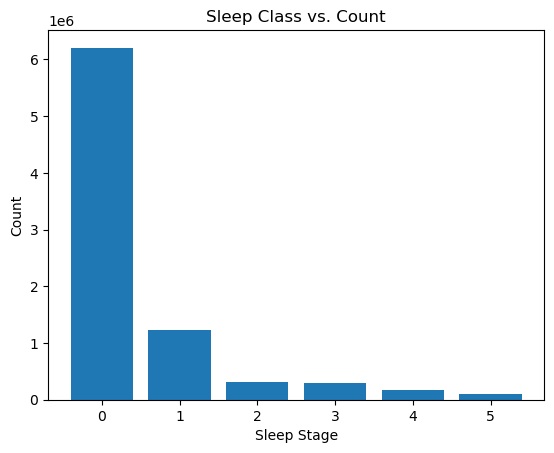

In [174]:
counts = df['target'].value_counts()
print(counts)
x = [0,1,2,3,4,5]

plt.xlabel("Sleep Stage")
plt.ylabel("Count")

plt.title('Sleep Class vs. Count')

plt.bar(x,counts)
plt.show() 

In [175]:
df = df.drop(df[df['target'] == 0].index)

In [176]:
sample_size = 0.6

df = df.groupby('target',group_keys=False).apply(lambda x: x.sample(frac=sample_size))
df = df[df.target != '0']

In [177]:
y = df['target']

y = y.astype('int64')
display(y)

3039386    1
4876327    1
3963141    1
4888484    1
3043234    1
          ..
3402971    5
4693250    5
4703458    5
4663750    5
4070750    5
Name: target, Length: 1261800, dtype: int64

In [178]:
X = df.drop('target', axis = 1)
display(X)

,time,Fpz-Cz,Pz-Oz,horizontal,submental
3039386,30393.86,-5.333333,10.595116,-2.625641,2.229686e-06
4876327,48763.27,2.952381,2.974115,-26.414652,2.760798e-06
3963141,39631.41,-1.047619,-1.249573,53.322589,3.020865e-06
4888484,48884.84,-8.000000,9.126007,-62.979243,2.198841e-06
3043234,30432.34,-8.285714,4.902320,-36.547009,2.229687e-06
...,...,...,...,...,...
3402971,34029.71,-0.190476,0.219536,-28.176801,8.655037e-08
4693250,46932.50,5.714286,2.055922,-36.106471,3.441014e-07
4703458,47034.58,-12.666667,2.423199,-4.387790,1.149961e-07
4663750,46637.50,-7.142857,-3.177778,-1.744567,1.792926e-07


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
display(X_train)

,time,Fpz-Cz,Pz-Oz,horizontal,submental
3303784,33037.84,5.619048,7.656899,3.982418,1.688354e-06
2987986,29879.86,-13.714286,9.493284,-25.533578,2.706339e-06
3951461,39514.61,-6.190476,1.321368,-19.806593,2.702930e-06
3669274,36692.74,-14.095238,2.423199,23.806593,1.643593e-06
4658947,46589.47,1.714286,-2.167766,17.639072,2.874946e-07
...,...,...,...,...,...
2858076,28580.76,-10.000000,6.738706,-4.387790,1.666975e-06
4154291,41542.91,4.476190,-2.075946,1.339194,1.675190e-07
4191873,41918.73,8.095238,1.780464,20.722833,1.528141e-06
4820163,48201.63,-0.571429,-1.433211,-1.304029,2.351418e-07


In [181]:
display(X_test)

,time,Fpz-Cz,Pz-Oz,horizontal,submental
4672110,46721.10,-2.561905e+01,4.259585,-3.506716,1.316173e-07
4400924,44009.24,-3.552381e+01,15.369719,-21.568742,1.662103e-06
3169061,31690.61,7.809524e+00,-9.421490,33.498413,1.189725e-06
3771168,37711.68,-5.809524e+01,9.768742,-41.833455,1.066708e-06
4471706,44717.06,-3.990476e+01,5.361416,6.625641,4.831805e-07
...,...,...,...,...,...
2968843,29688.43,-1.238095e+00,2.974115,174.910867,2.723477e-06
3449502,34495.02,-1.065814e-14,-1.984127,-13.198535,1.503107e-07
4860485,48604.85,1.714286e+00,3.800488,-18.925519,1.568044e-07
3517780,35177.80,1.342857e+01,0.127717,24.687668,2.583130e-06


In [182]:
display(y_train)

3303784    2
2987986    1
3951461    2
3669274    2
4658947    5
          ..
2858076    2
4154291    2
4191873    2
4820163    2
4431274    2
Name: target, Length: 1009440, dtype: int64

In [183]:
display(y_test)

4672110    5
4400924    2
3169061    4
3771168    4
4471706    3
          ..
2968843    2
3449502    2
4860485    2
3517780    1
3527144    1
Name: target, Length: 252360, dtype: int64

In [184]:
#clf = LogisticRegression(multi_class='ovr', solver='liblinear',random_state=42).fit(X_train, y_train)

In [185]:
#X_train = X_train.array()

#X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

In [186]:
#model = Sequential()
#model.add(LSTM(50, input_shape=(X_train, X_train)))
#model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')

In [187]:
#results = clf.predict(X_test)

In [188]:
#display(results)

In [189]:
#clf.score(X_test, y_test)

In [190]:
#ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
#plt.show()

In [191]:
features = ['Fpz-Cz','Pz-Oz','horizontal','submental']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

#tree.plot_tree(dtree, feature_names=features) 

y_pred = dtree.predict(X_test)

In [192]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999603740687906


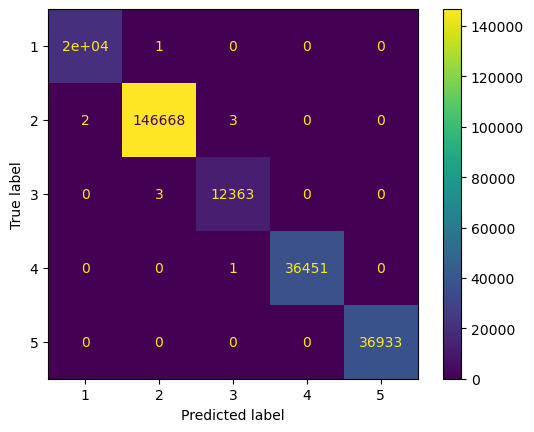

In [193]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)
plt.show()

In [199]:
k_folds = KFold(n_splits = 5)

scores = cross_val_score(dtree, X, y, cv = k_folds) 

In [200]:
display(scores.mean())

0.7246608020288476

In [195]:
Data_1 = 83.69
Data_3 = 72.25
Data_4 = 63.20
Data_5 = 86.13
Data_6 = 85.46
Data_10 = 71.74
Data_11 = 70.36
Data_12 = 72.46

kfold_mean = [83.69,72.25,63.20,86.13,85.46,71.74,70.36,72.46]

display(statistics.mean(kfold_mean))

75.66125